 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [70]:
# Reading whale returns
portfolio_csv = Path("Resources/whale_returns.csv")
portfolio = pd.read_csv(portfolio_csv, 
                        index_col = "Date", 
                        infer_datetime_format = True, 
                        parse_dates = True
                       )
portfolio.sort_index(inplace = True)
portfolio.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
portfolio = portfolio.dropna().copy()
##portfolio.isnull().sum()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [68]:
# Reading algorithmic returns
returns_csv = Path("Resources/algo_returns.csv")
returns = pd.read_csv(returns_csv,
                      index_col = "Date",
                      infer_datetime_format = True, 
                      parse_dates = True
                     )
returns.sort_index(inplace = True)
returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
returns = returns.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_csv,
                    index_col = "Date",
                    infer_datetime_format = True, 
                    parse_dates = True                                          
                    )
sp500.sort_index(inplace = True)
sp500.head(5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
sp500["Close"] = sp500["Close"].replace("$"," ")
sp500["Close"] = sp500["Close"].astype("float")

In [20]:
# Calculate Daily Returns
returns_daily = sp500.pct_change()
returns_daily

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
# Drop nulls
returns_daily = returns_daily.dropna().copy()

In [22]:
# Rename `Close` Column to be specific to this portfolio.
returns_daily = returns_daily.rename(columns = {"Close" : "S & P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_append = pd.concat([portfolio, 
                                returns, 
                                returns_daily], 
                               axis = "columns", 
                               join = "inner")
column_append

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

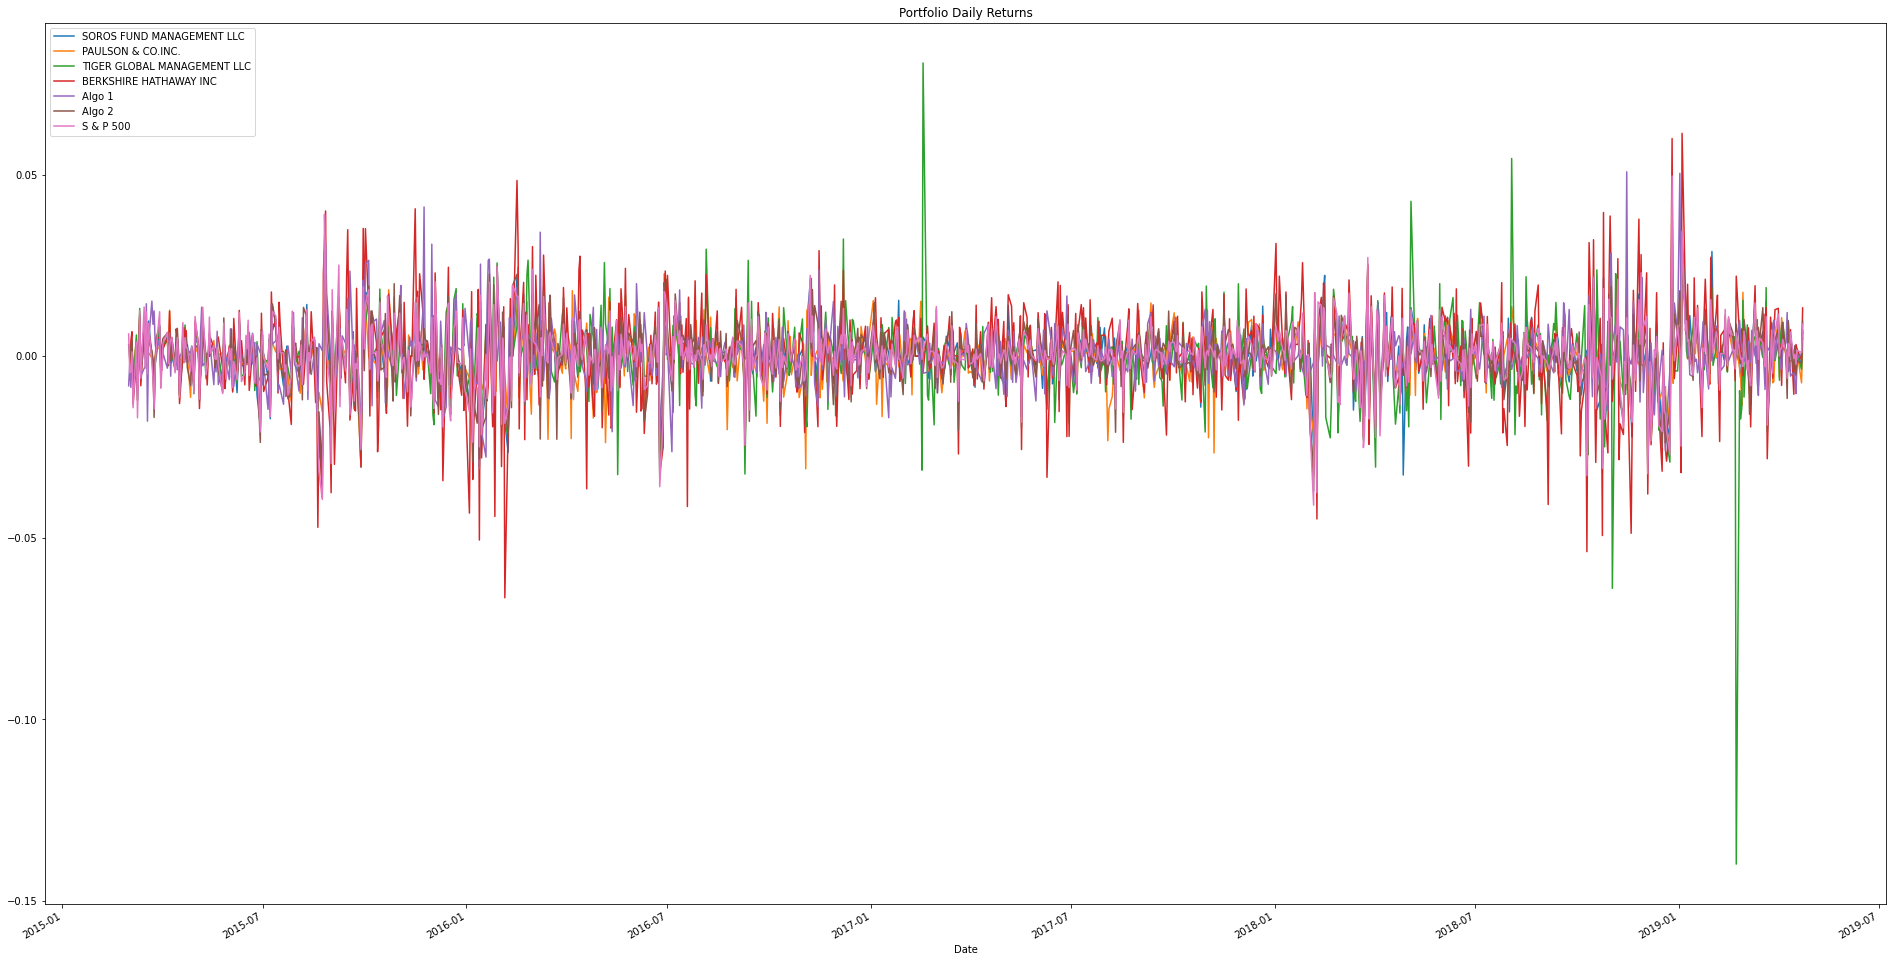

In [24]:
# Plot daily returns of all portfolios
column_append.plot(figsize = (33, 18), title = "Portfolio Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':' Cumulative Returns'}, xlabel='Date'>

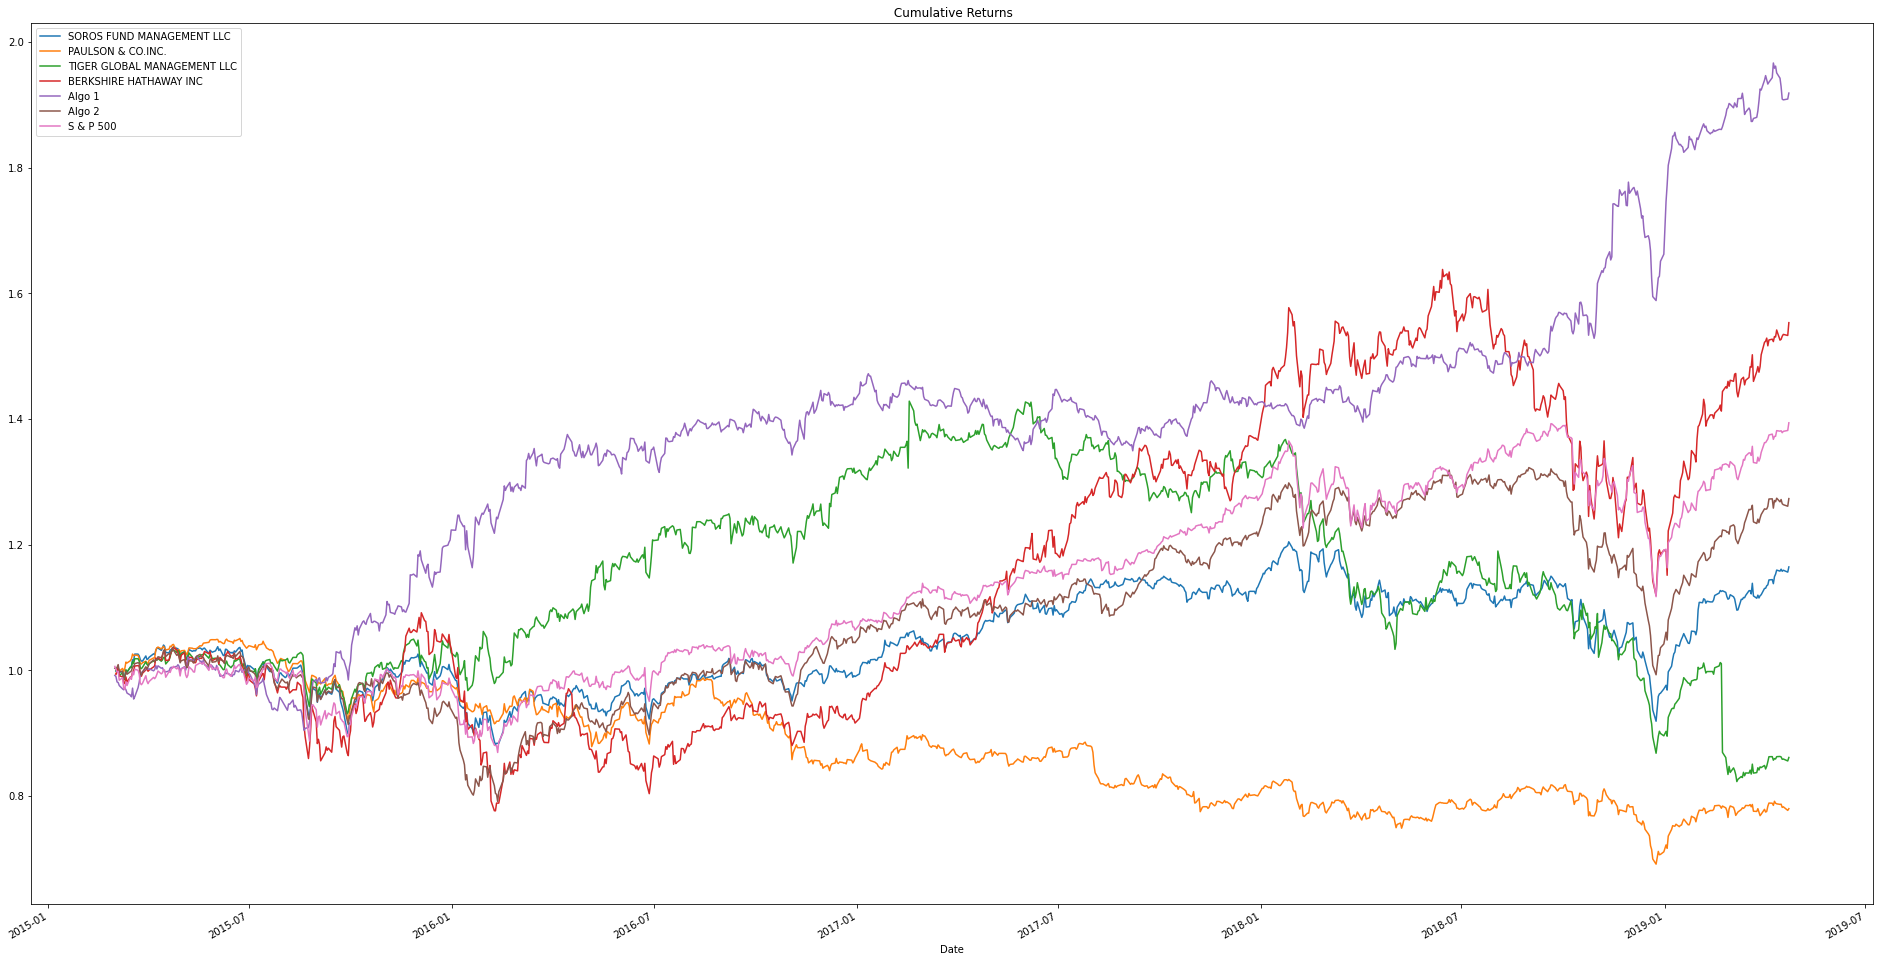

In [25]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + column_append).cumprod()
# Plot cumulative returns
cum_returns.plot(figsize = (33, 18), title = " Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Boxplot Visualization'}>

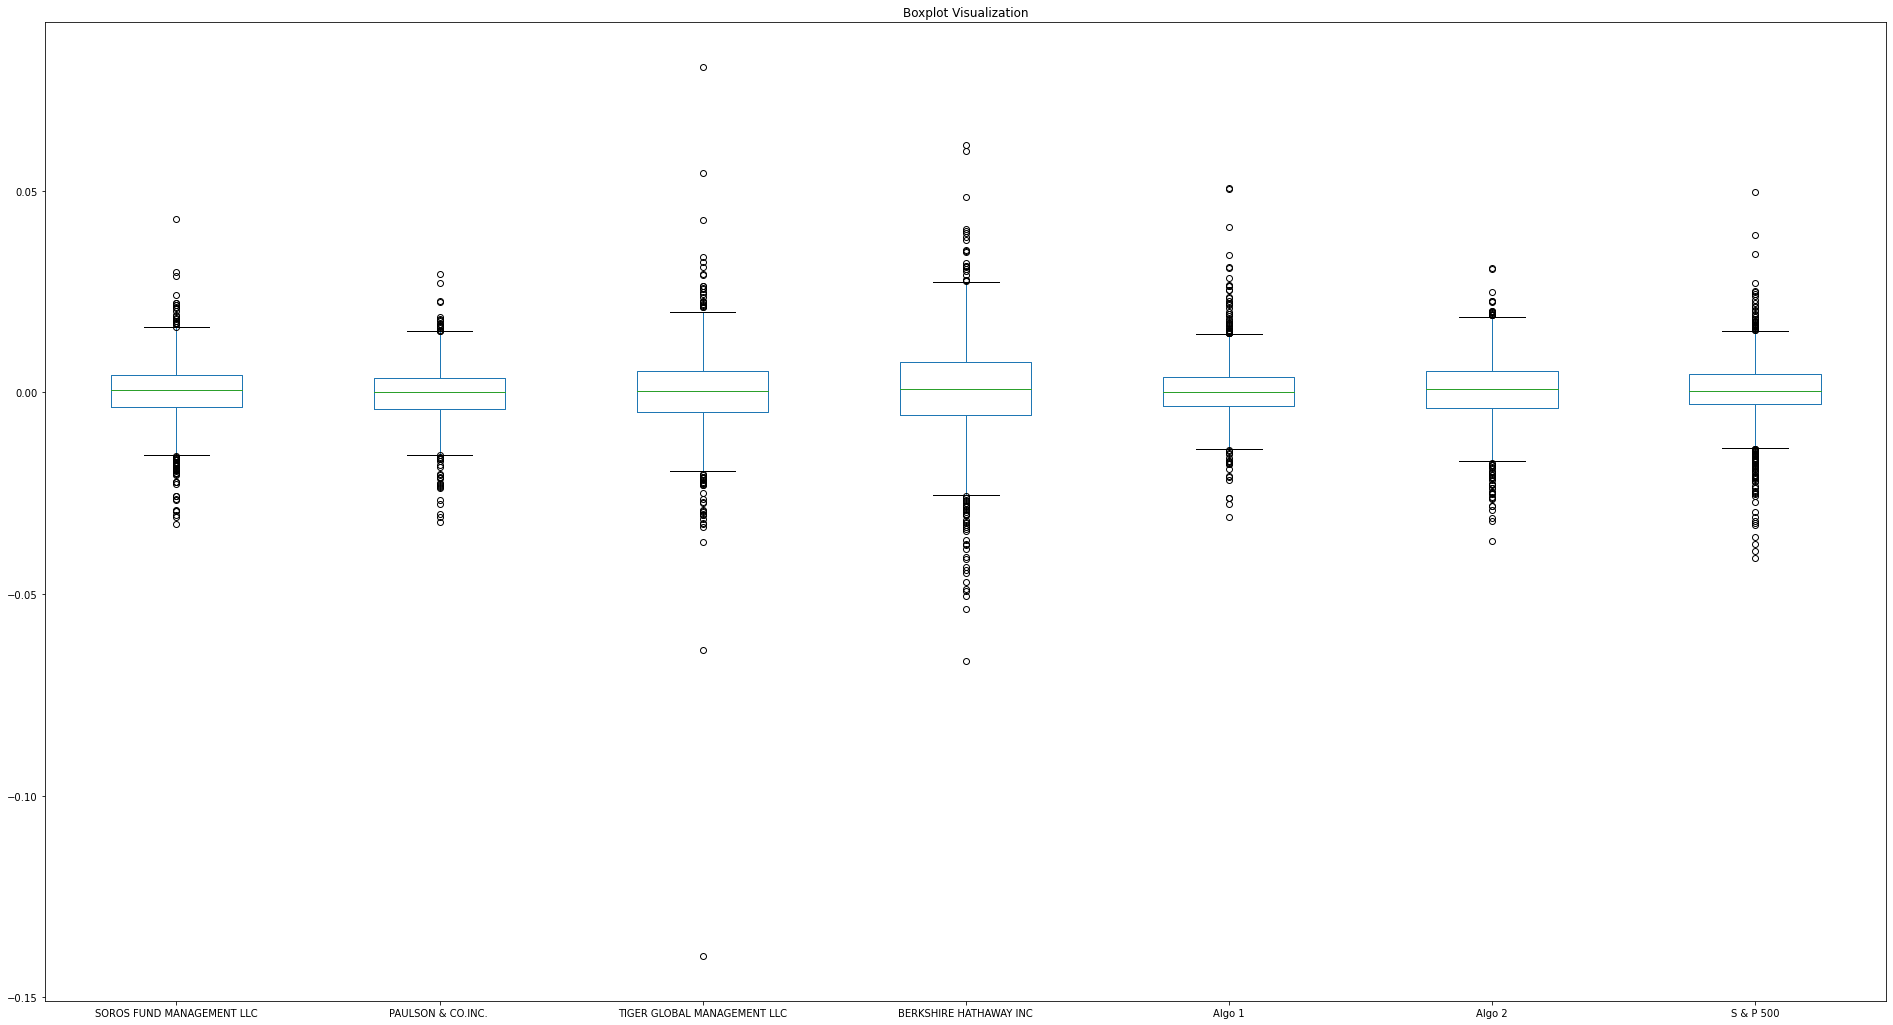

In [26]:
# Box plot to visually show risk
column_append.plot.box(figsize = (33, 18), title = "Boxplot Visualization")

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
column_append.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S & P 500                      0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = column_append["S & P 500"].std()
# Determine which portfolios are riskier than the S&P 500

##if column_append.std > sp500_std:
    ##print(column_append.std)
column_append.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S & P 500                      False
dtype: bool

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
column_append.rolling(window = 252).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.009383,0.007333,0.014700,0.015245,0.008211,0.008598,0.009481
2019-04-17,0.009375,0.007339,0.014696,0.015200,0.008240,0.008592,0.009460
2019-04-18,0.009369,0.007337,0.014692,0.015197,0.008228,0.008591,0.009461


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 - Day Rolling Standard Dev.'}, xlabel='Date'>

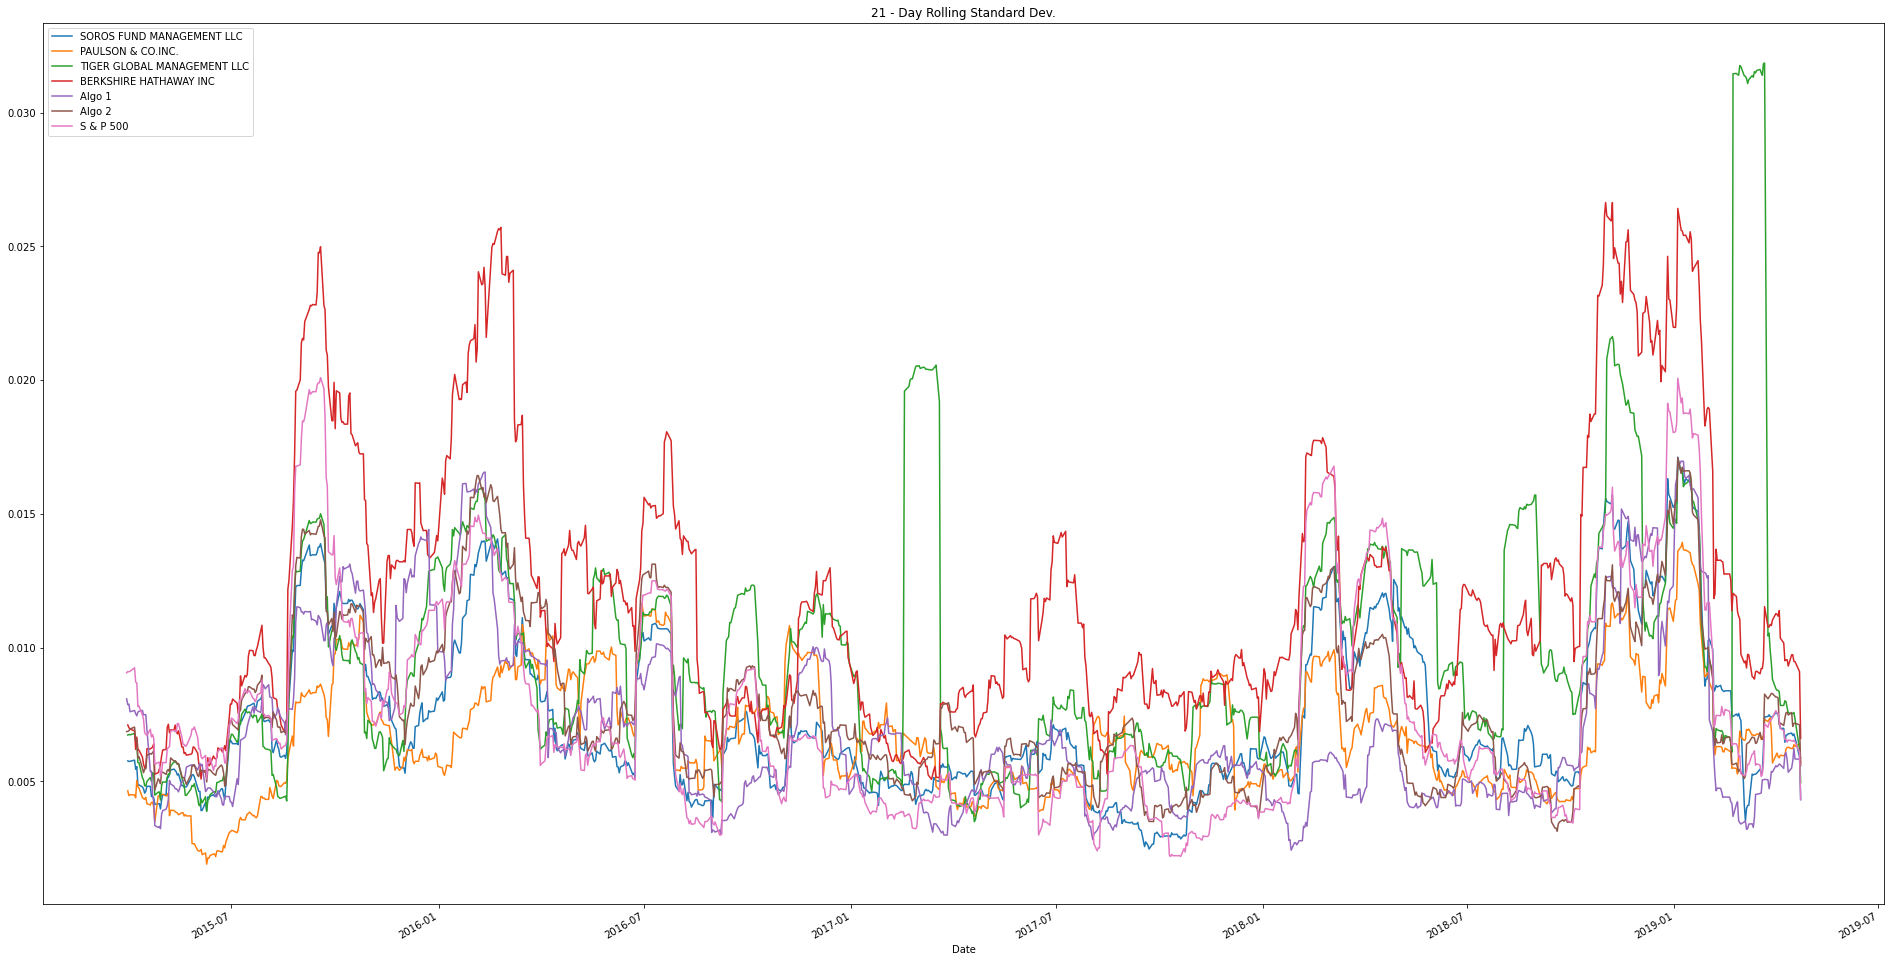

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
column_append.rolling(window = 21).std()
# Plot the rolling standard deviation
column_append.rolling(window = 21).std().plot(figsize = (33, 18), title = "21 - Day Rolling Standard Dev.")

### Calculate and plot the correlation

<AxesSubplot:>

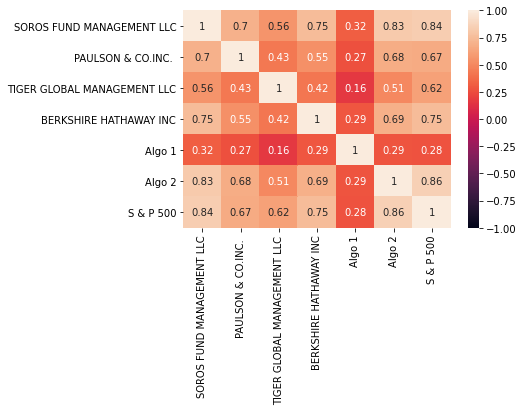

In [41]:
# Calculate the correlation
correlation = column_append.corr()
# Display de correlation matrix
sns.heatmap(correlation,
           vmin = -1,
           vmax = 1,
           annot = True,
           )

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Hathaway Beta'}, xlabel='Date'>

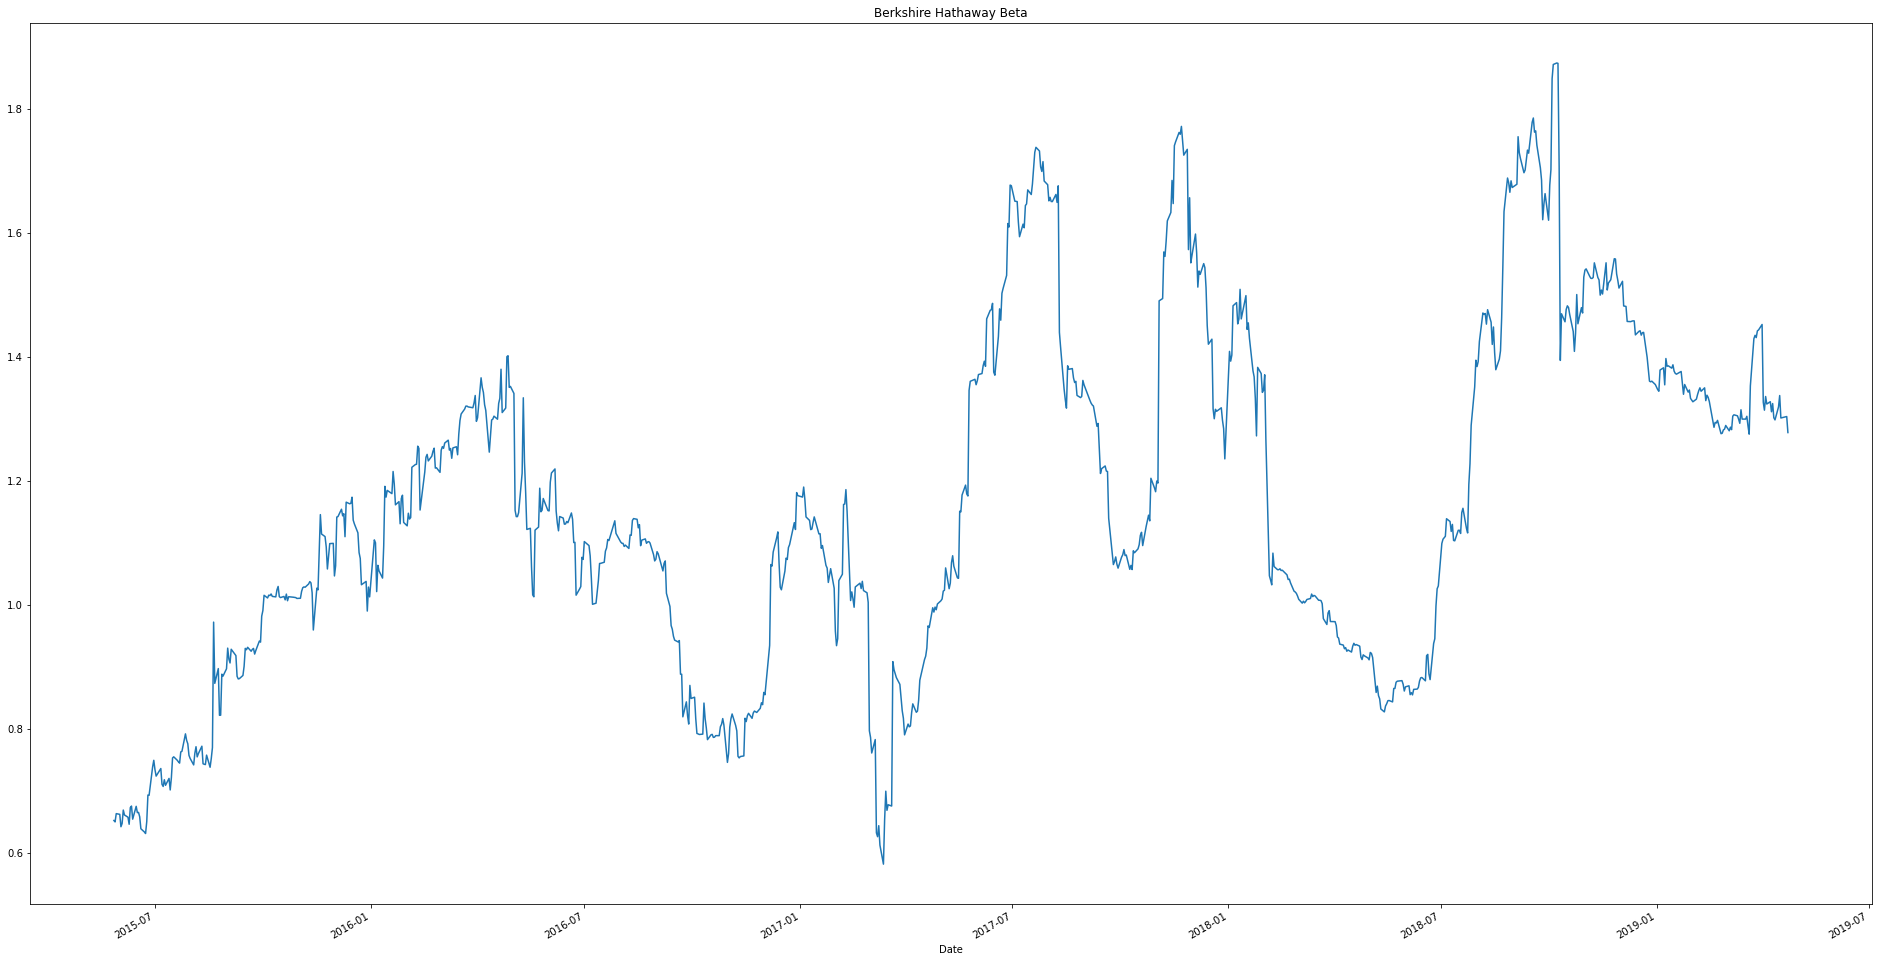

In [48]:
# Calculate covariance of a single portfolio
covar = column_append['BERKSHIRE HATHAWAY INC'].rolling(60).cov(column_append['S & P 500'])
# Calculate variance of S&P 500
variance = column_append['S & P 500'].rolling(60).var()
# Computing beta
sp_beta = covar / variance
# Plot beta trend
sp_beta.plot(figsize = (33,18), title = "Berkshire Hathaway Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average for 21 Day Halflife'}, xlabel='Date'>

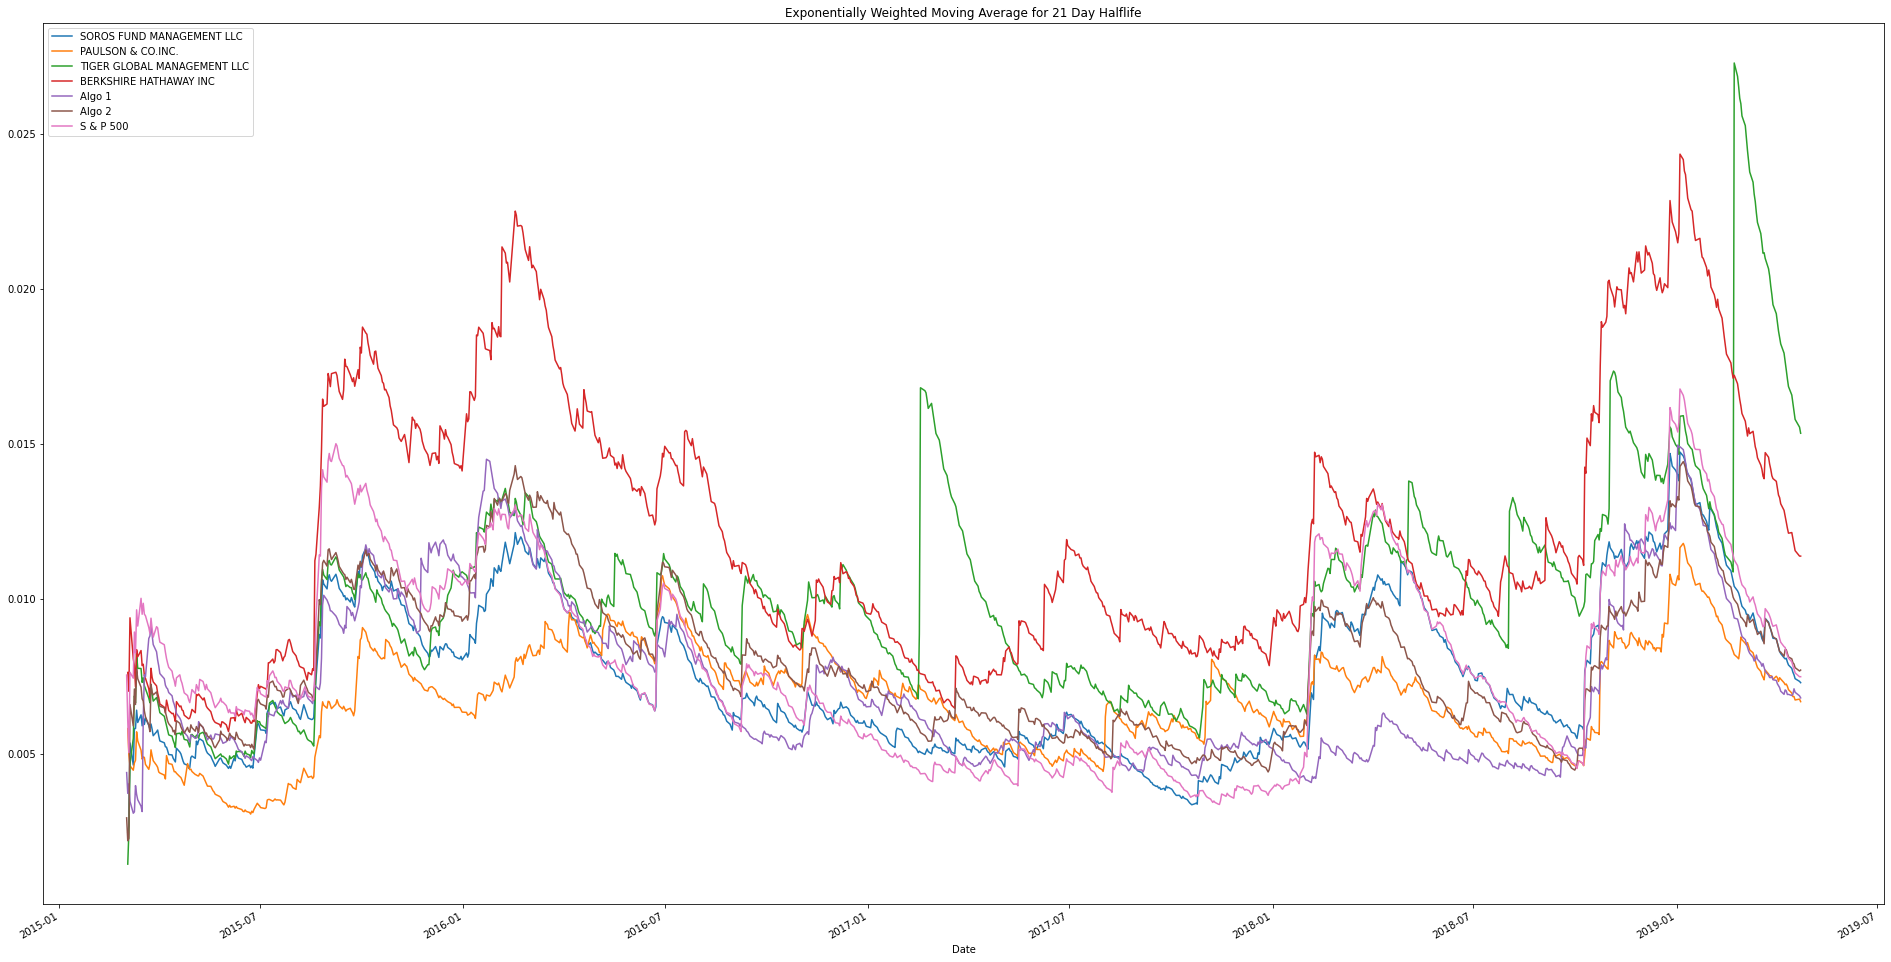

In [50]:
# Use `ewm` to calculate the rolling window
column_append.ewm(com = None,
                  span = None,
                 halflife = 21,
                 alpha  = None,
                 min_periods = 0,
                 adjust = True,
                 ignore_na = False,
                 axis = 0).std().plot(figsize = (33, 18), title = "Exponentially Weighted Moving Average for 21 Day Halflife")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Annualized Sharpe Ratios
sharpe = (column_append.mean()*252)/ (column_append.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

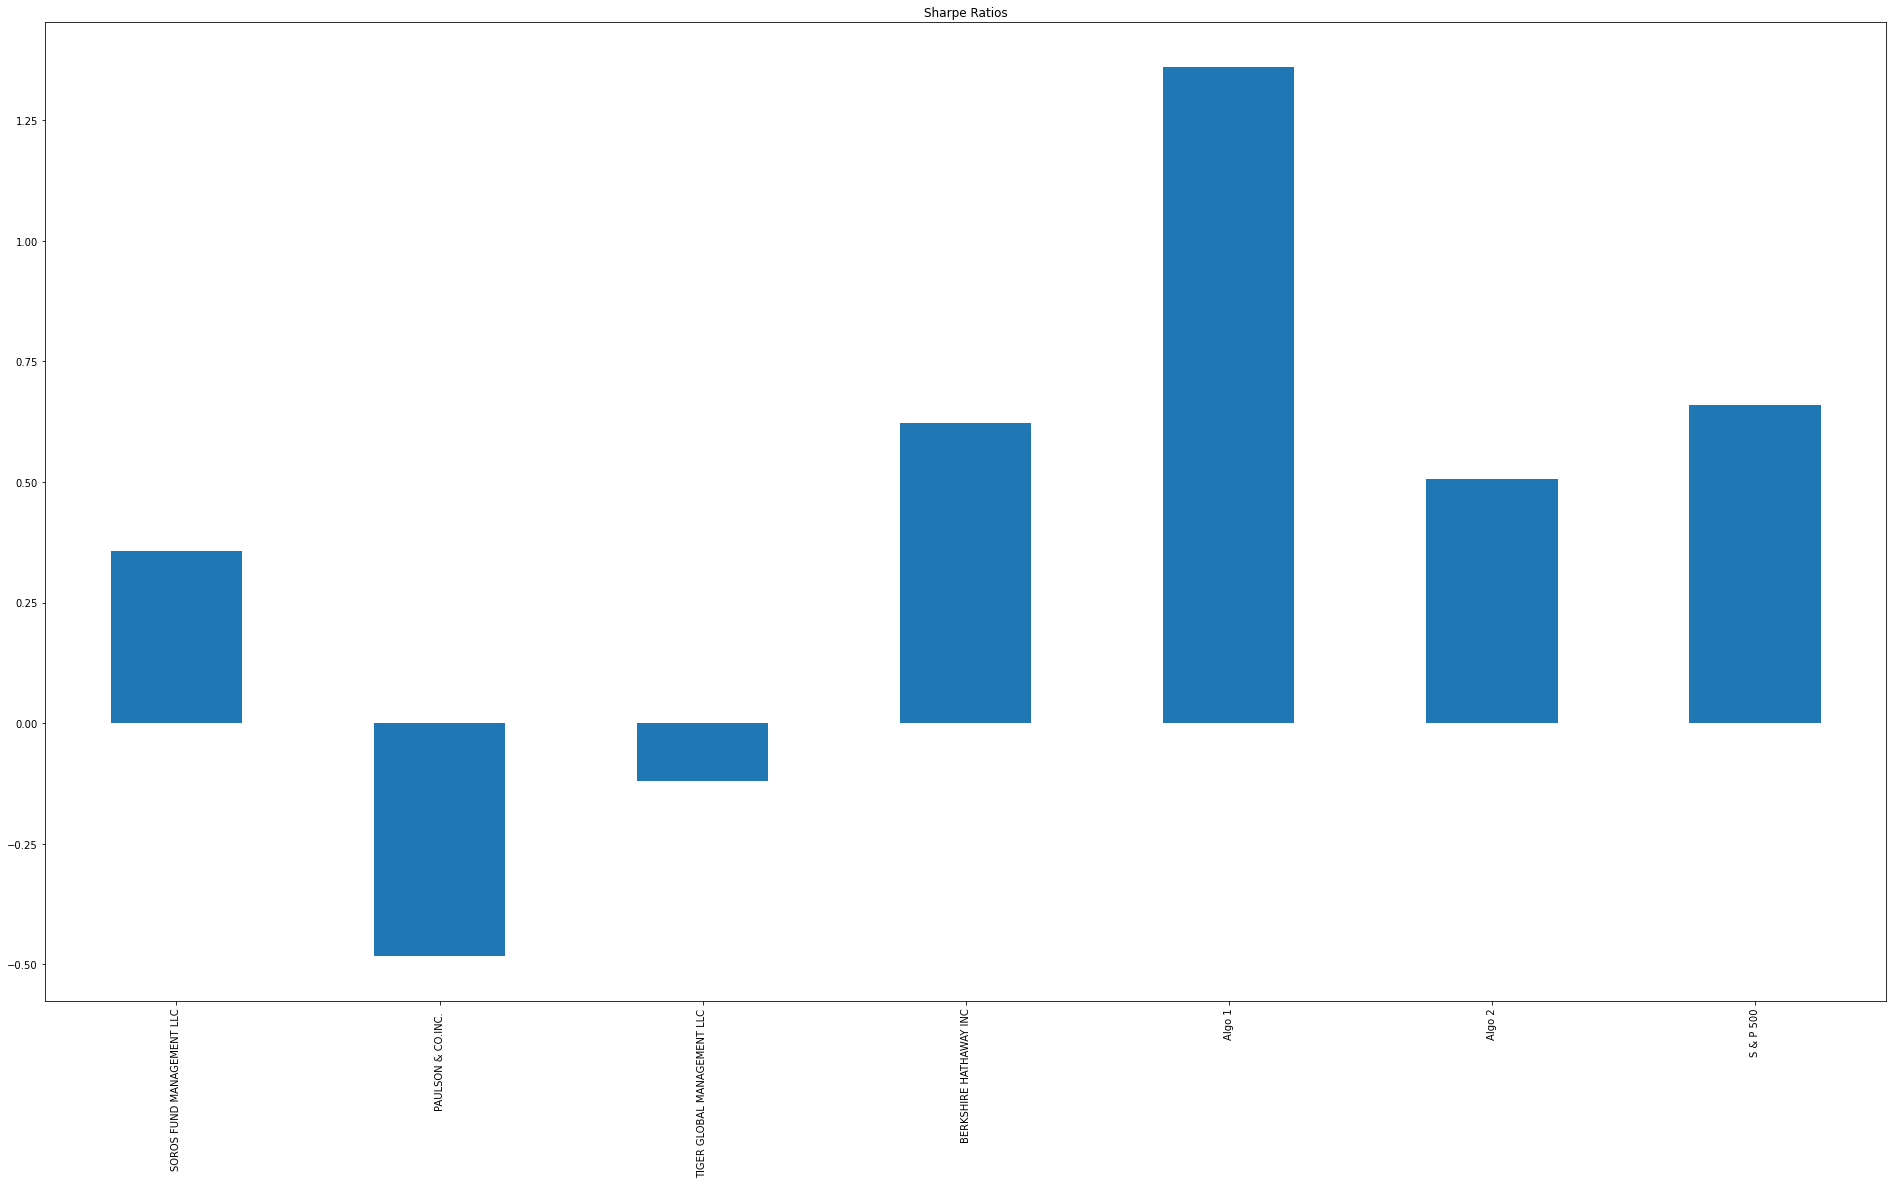

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind = 'bar', figsize = (33, 18), title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Overall, thw algorithmic strategies well outperformed both of the portfolios it was compared to. Although the EWMA's are apparently average, the algorithim has shown a substantially higher sharpe ratio, with ultimately more cumulative returns in the end.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [64]:
# Reading data from 1st stock
apple_csv = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
apple_df = apple_df.drop(["Symbol"], axis = 1)
apple_df.sort_values("Trade DATE", ascending = False)
apple_df = apple_df.rename(columns = {'NOCP' : 'AAPL'})
apple_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [89]:
# Reading data from 2nd stock
google_csv = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
google_df = google_df.drop(["Symbol"], axis = 1)
google_df.sort_values("Trade DATE", ascending = False)
google_df = google_df.rename(columns = {'NOCP' : 'GOOG'})
google_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [90]:
# Reading data from 3rd stock
costco_csv = Path("Resources/cost_historical.csv")
costco_df = pd.read_csv(costco_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
costco_df = costco_df.drop(["Symbol"], axis = 1)
costco_df.sort_values("Trade DATE", ascending = False)
costco_df = costco_df.rename(columns = {'NOCP' : 'COST'})
costco_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [91]:
# Combine all stocks in a single DataFrame
stocks_combined1 = pd.concat([apple_df, google_df, costco_df], axis = "columns", join = "inner")
stocks_combined1.head(5)

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [92]:
# Reset Date index
stocks_combined1.sort_values("Trade DATE", ascending = True)

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [93]:
# Reorganize portfolio data by having a column per symbol
pd.pivot_table(stocks_combined1, 
               values = None, 
               index = ["Trade DATE"], 
               columns = None, 
               aggfunc = "mean", 
               fill_value = None, 
               margins = False, 
               dropna = True, 
               margins_name = 'Symbol', 
               observed = False)

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Trade DATE'>

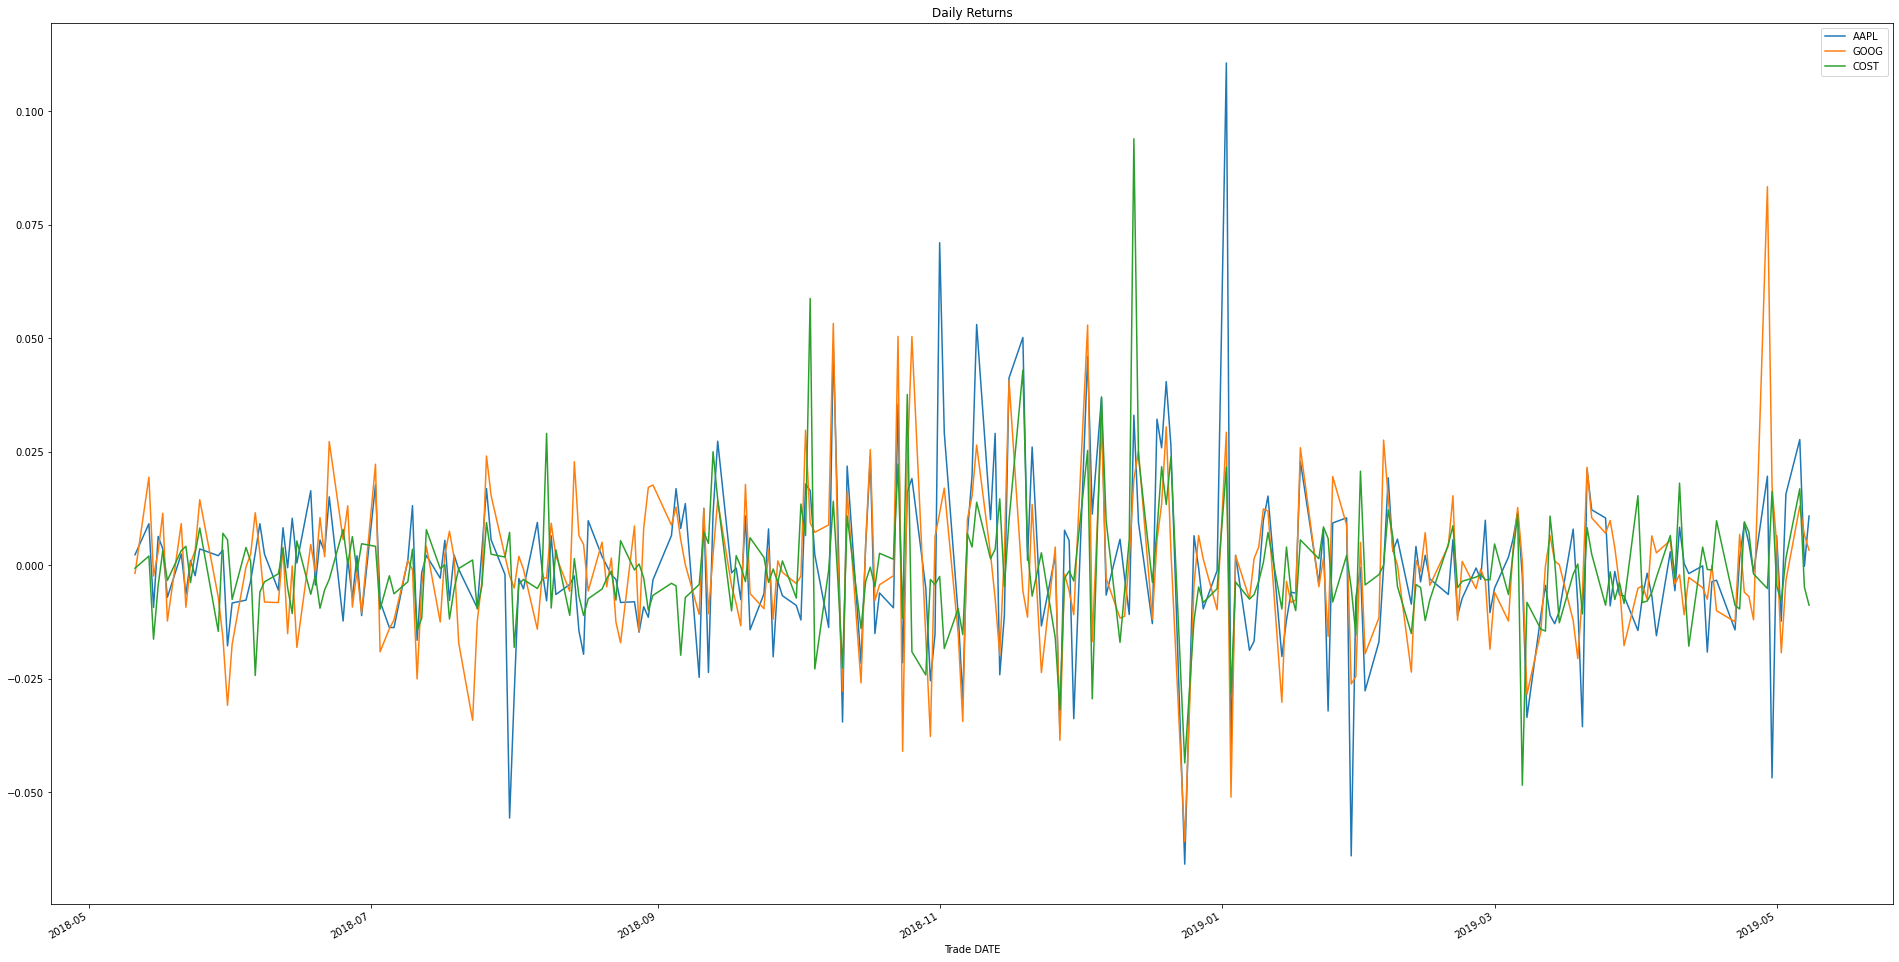

In [94]:
# Calculate daily returns
returns_daily2 = stocks_combined1.pct_change()
# Drop NAs
stocks_combined1.dropna().copy()
# Display sample data
returns_daily2.plot(figsize = (33,18), title = 'Daily Returns')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [95]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = (1 + returns_daily2).cumprod() - 1
# Display sample data
portfolio_return

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,0.010662,0.010083,-0.013513
2019-05-06,0.038661,0.023237,0.003122
2019-05-03,0.054952,0.019804,0.004723
...,...,...,...
2018-05-17,-0.068404,-0.072085,-0.180186
2018-05-16,-0.062475,-0.069349,-0.183842
2018-05-15,-0.071144,-0.071534,-0.197108


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [96]:
# Join your returns DataFrame to the original returns DataFrame
stocks_combined = pd.concat([stocks_combined1, column_append], axis = "columns", join = "inner")

In [97]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
stocks_combined.dropna().copy()
stocks_combined.head(5)

,AAPL,GOOG,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
2019-04-23,207.48,1264.55,245.58,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,204.53,1248.84,243.42,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,203.86,1236.37,245.81,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,203.13,1236.34,245.56,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,199.25,1227.13,245.34,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [98]:
# Calculate the annualized `std`
stocks_combined.rolling(window = 252)
stocks_combined

,AAPL,GOOG,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
2019-04-23,207.48,1264.55,245.58,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,204.53,1248.84,243.42,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,203.86,1236.37,245.81,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,203.13,1236.34,245.56,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,199.25,1227.13,245.34,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...,...,...
2018-05-17,186.99,1078.59,199.60,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,188.18,1081.77,198.71,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,186.44,1079.23,195.48,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,188.15,1100.20,195.88,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD of 21 Day Window'}>

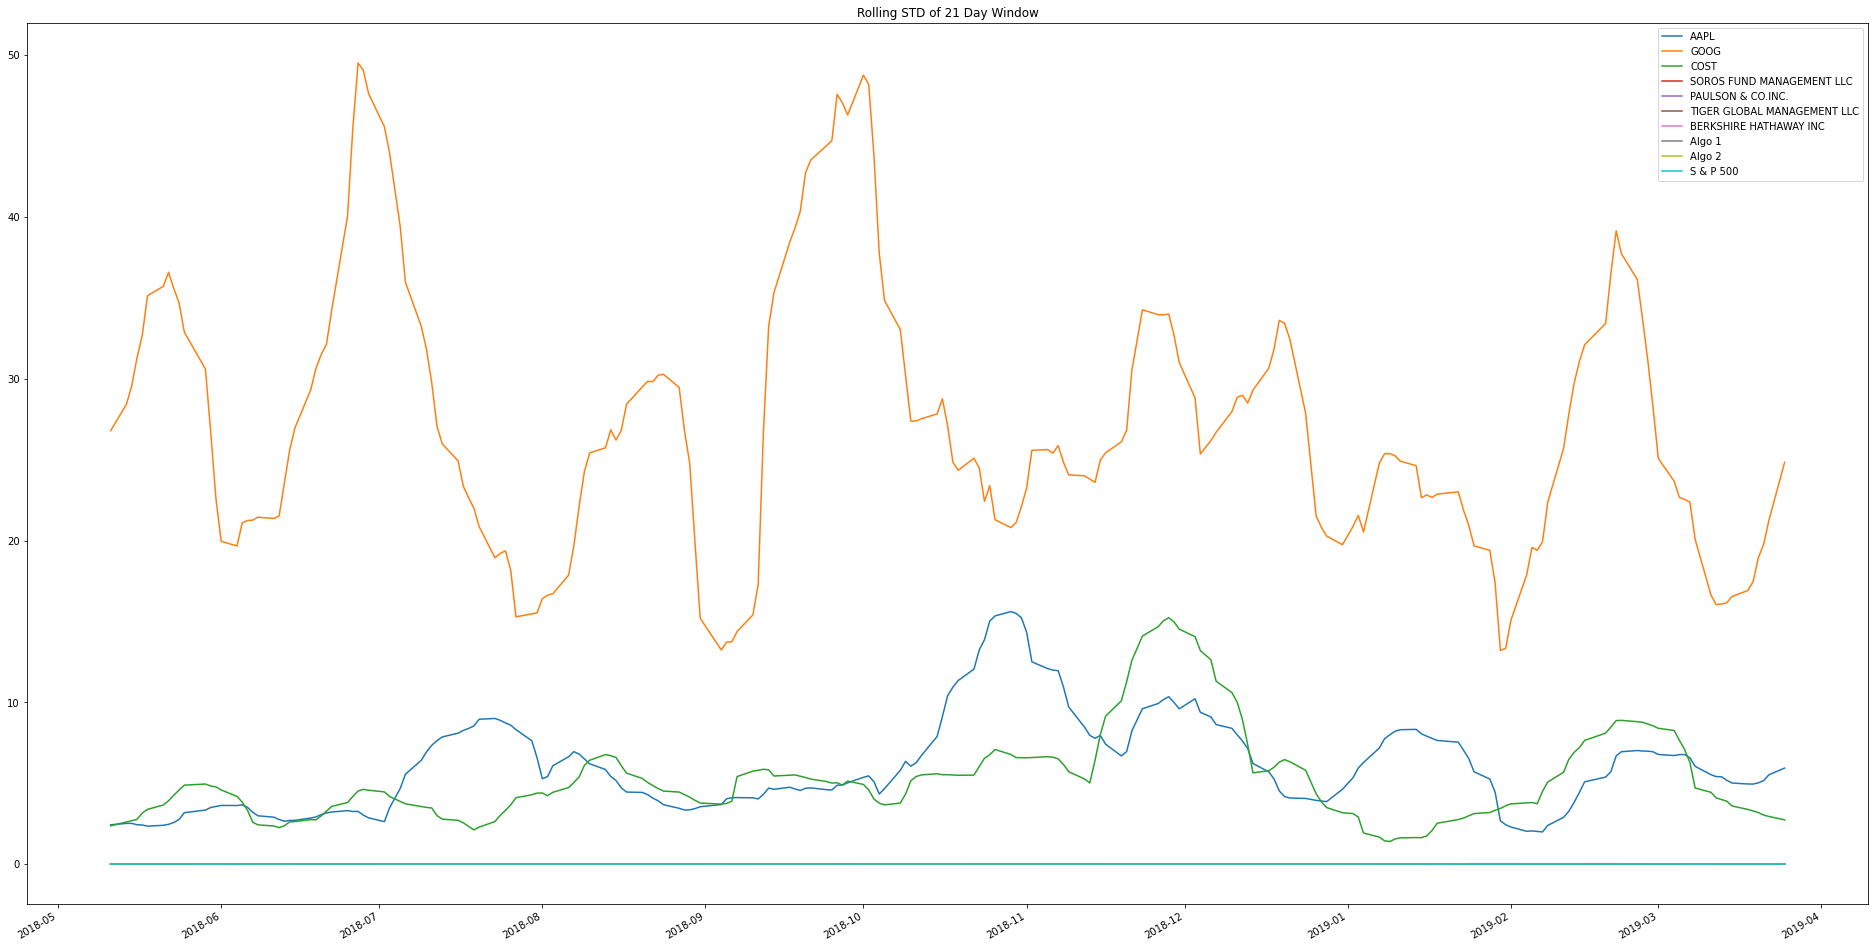

In [99]:
# Calculate rolling standard deviation
stocks_combined.rolling(window = 252)
# Plot rolling standard deviation
stocks_combined.rolling(window = 21).std().plot(figsize = (33, 18), title = "Rolling STD of 21 Day Window")

### Calculate and plot the correlation

<AxesSubplot:>

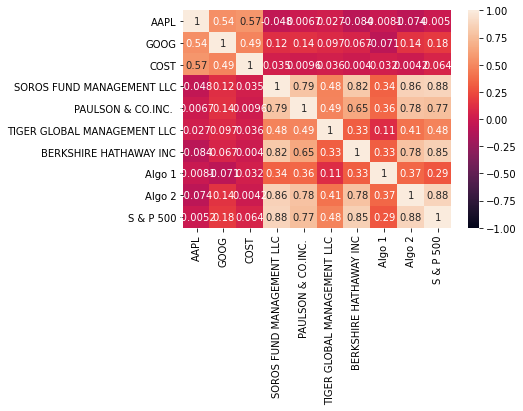

In [100]:
# Calculate and plot the correlation
correlate = stocks_combined.corr()
##correlate.plot(figsize = (33, 18), title = "Correlation")
sns.heatmap(correlate, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Portfolio Beta'}>

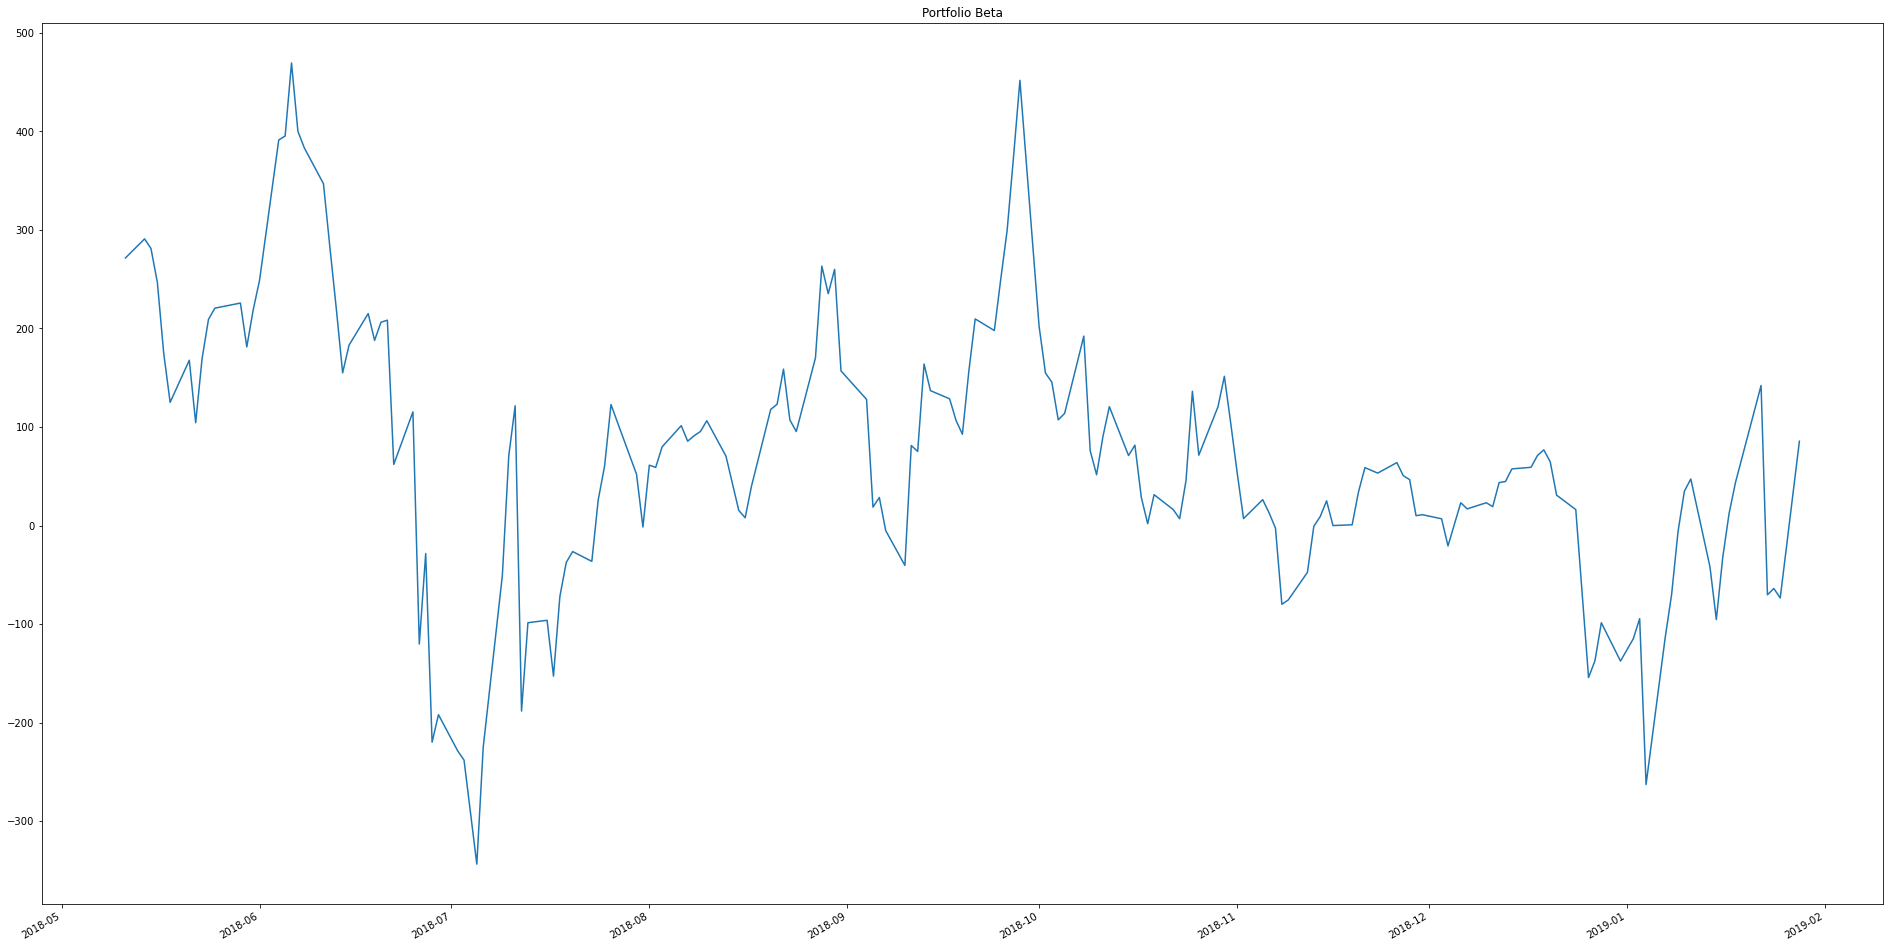

In [108]:
# Calculate and plot Beta
covar2 = stocks_combined["AAPL"].rolling(60).cov(stocks_combined["S & P 500"])
var2 = stocks_combined["S & P 500"].rolling(60).var()
spBeta = covar2 / var2
spBeta.plot(figsize = (33, 18), title = "Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [110]:
# Calculate Annualzied Sharpe Ratios
sharpe2 = (stocks_combined.mean()*252)/(stocks_combined.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

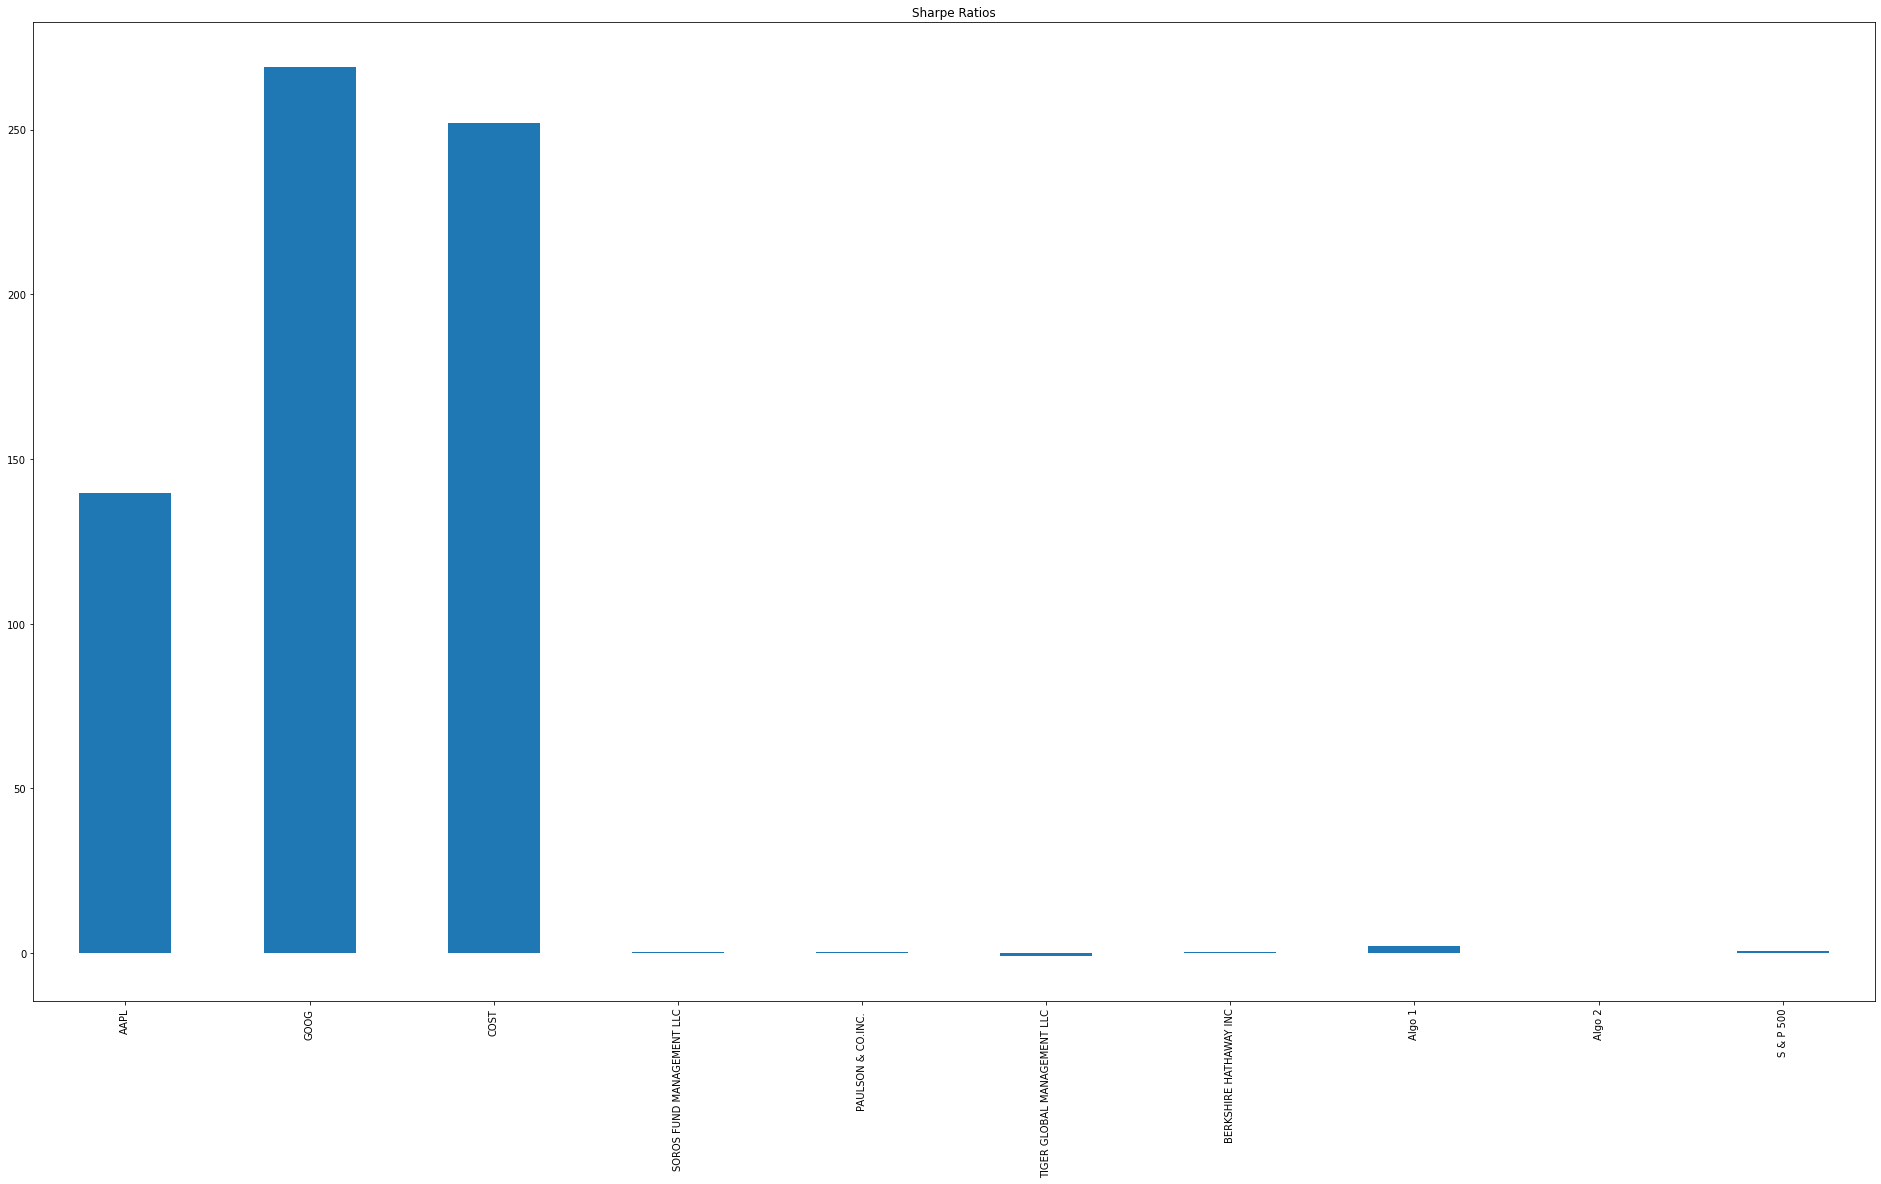

In [112]:
# Visualize the sharpe ratios as a bar plot
sharpe2.plot(kind = 'bar', figsize = (33, 18), title = "Sharpe Ratios")

### How does your portfolio do?

My custom portfolio does amazing when compared with the other 497 companies in the S & P 500 index.